In [97]:
from scipy.stats import poisson
import numpy  as np
from numpy.random import gamma
import  matplotlib.pyplot as plt
# import seaborn as sns
import pandas as pd
import matplotlib.patches as mpatches

# Guía 02

## Ejercicio 1

Se observa la realización de $n$ variables aleatorias Poisson independientes de 
parámetro $\lambda$. 
Escribir y graficar la función de Likelihood $L(\lambda)$ para cada caso:

1. ($y_1$, $y_2$, $y_3$) = (3, 7, 19)
1. ($y_1$, $y_2$, $y_3$, $y_4$) = (12, 12, 12, 0)
1. $y_1$ = 12
1. ($y_1$, $y_2$, $y_3$, $y_4$, $y_5$) = (16, 10, 17, 11, 11)


**Rta:**

Para calcular el Likelihood de una función Poisson usamos

$L(\lambda) \propto e^{-n\lambda} \lambda^{\sum_i y_i}$

el máximo res es: 9357622968840174.000000 está en lambda=[10]
el máximo res es: 164408213114736913416192.000000 está en lambda=[12]
el máximo res es: 5225513707333525504.000000 está en lambda=[9]
el máximo res es: 54782414.517690 está en lambda=[12]
el máximo res es: 150375324051726239547837972786747043169173504.000000 está en lambda=[13]


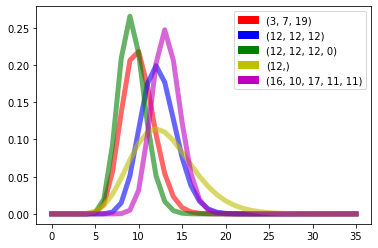

In [32]:

lambdas = list(range(0, 36))
ys = [(3, 7, 19),
     (12, 12, 12), #, 0),
     (12, 12, 12, 0),
     (12,),
     (16, 10, 17, 11, 11)]

res_global = []
fig, ax = plt.subplots(1, 1)
colors = ["r", "b", "g", "y", "m"]
for idx,y in enumerate(ys):
    res = []
    for l in lambdas:
        res.append(np.exp(-len(y)*l) * l**(sum(y)))
    res_global.append(res)

    print(f"el máximo res es: {max(res):02f} está en lambda={[lambdas[idx] for idx,val in enumerate(res) if val==max(res)]}")
    res_norm = [r/sum(res) for r in res]
    ax.plot(lambdas, res_norm,
            f'{colors[idx]}-', lw=5, alpha=0.6)


patch = [mpatches.Patch(color=colors[idx], label=f'{ys[idx]}') for idx in range(len(ys))]
plt.legend(handles=patch)


## Ejercicio 2

Suponiendo un prior $ \lambda \sim Gamma(24,2)$, especificar y graficar la distribución posterior para $\lambda$ correspondiente a cada escenario del ejercicio anterior.

para 0 obtengo: 0 y 0
para 1 obtengo: 0 y 1
para 2 obtengo: 1 y 0
para 3 obtengo: 1 y 1


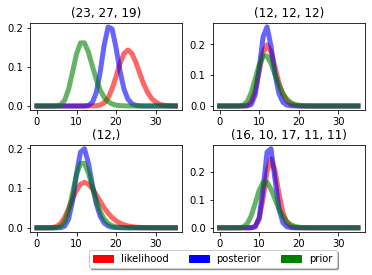

In [94]:
s = 24
r = 2
lambdas = list(range(0, 36))
ys = [(23, 27, 19),
     (12, 12, 12), #, 0),
    #   (12, 12, 12, 0),
      (12,),
      (16, 10, 17, 11, 11)]

res_global = []
fig, ax = plt.subplots(2, 2)
fig.subplots_adjust(hspace=0.4, top=0.85)
colors = ["r", "b", "g", "y", "m"]
for idx,y in enumerate(ys):
    prior = []
    likelihood = []
    posterior = []
    for l in lambdas:
        prior.append(np.exp(-r*l) * l**(s-1))
        likelihood.append(np.exp(-len(y)*l) * l**(sum(y)))
        posterior.append(
            np.exp(-(len(y)+r)*l) * l**(s+sum(y)-1)
            )
    # res_global.append(res)

    prior_norm = [a/sum(prior) for a in prior]
    likelihood_norm = [a/sum(likelihood) for a in likelihood]
    post_norm = [a/sum(posterior) for a in posterior]
    ax[idx//2,idx%2].plot(lambdas, likelihood_norm,
            f'{colors[0]}-', lw=5, alpha=0.6)
    ax[idx//2,idx%2].plot(lambdas, post_norm,
            f'{colors[1]}-', lw=5, alpha=0.6)
    ax[idx//2,idx%2].plot(lambdas, prior_norm,
            f'{colors[2]}-', lw=5, alpha=0.6)

    # plt.xlim([0,20])
    ax[idx//2,idx%2].title.set_text(f"{y}")
    print(f"para {idx} obtengo: {idx//2} y {idx%2}")

patch = [mpatches.Patch(color=colors[idx], label=f'{val}') 
            for idx,val in enumerate(["likelihood", "posterior", "prior"])]
plt.legend(loc='upper center', bbox_to_anchor=(0, -0.15),
          fancybox=True, shadow=True, ncol=5, handles=patch)

# patch = [mpatches.Patch(color=colors[idx], label=f'{ys[idx]}') for idx in range(len(ys))]
# plt.legend(handles=patch)

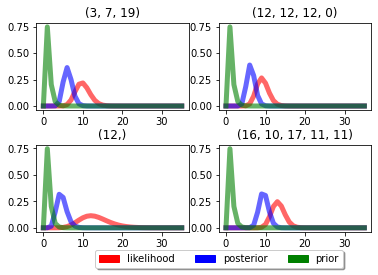

In [90]:
s = 2
r = 2
lambdas = list(range(0, 36))
ys = [(3, 7, 19),
#      (12, 12, 12), #, 0),
     (12, 12, 12, 0),
     (12,),
     (16, 10, 17, 11, 11)]

res_global = []
fig, ax = plt.subplots(2, 2)
fig.subplots_adjust(hspace=0.4, top=0.85)
colors = ["r", "b", "g", "y", "m"]
for idx,y in enumerate(ys):
    prior = []
    likelihood = []
    posterior = []
    for l in lambdas:
        prior.append(np.exp(-r*l) * l**(s-1))
        likelihood.append(np.exp(-len(y)*l) * l**(sum(y)))
        posterior.append(
            np.exp(-(len(y)+r)*l) * l**(s+sum(y)-1)
            )
    # res_global.append(res)

    prior_norm = [a/sum(prior) for a in prior]
    likelihood_norm = [a/sum(likelihood) for a in likelihood]
    post_norm = [a/sum(posterior) for a in posterior]
    ax[idx//2,idx%2].plot(lambdas, likelihood_norm,
            f'{colors[0]}-', lw=5, alpha=0.6)
    ax[idx//2,idx%2].plot(lambdas, post_norm,
            f'{colors[1]}-', lw=5, alpha=0.6)
    ax[idx//2,idx%2].plot(lambdas, prior_norm,
            f'{colors[2]}-', lw=5, alpha=0.6)

    # plt.xlim([0,20])
    ax[idx//2,idx%2].title.set_text(f"{y}")
    # print(f"para {idx} obtengo: {idx//2} y {idx%2}")

patch = [mpatches.Patch(color=colors[idx], label=f'{val}') 
            for idx,val in enumerate(["likelihood", "posterior", "prior"])]
plt.legend(loc='upper center', bbox_to_anchor=(0, -0.15),
          fancybox=True, shadow=True, ncol=5, handles=patch)

# Ejercicio 4
a = "a"
b= "b"



## Ejercicio 5




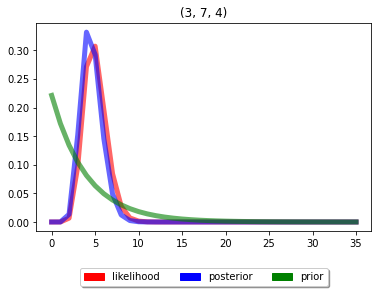

In [95]:
s = 1
r = 0.25
lambdas = list(range(0, 36))
ys = [
        (3, 7, 4),
     ]

res_global = []
fig, ax = plt.subplots(1, 1)
fig.subplots_adjust(hspace=0.4, top=0.85)
colors = ["r", "b", "g", "y", "m"]
for idx,y in enumerate(ys):
    prior = []
    likelihood = []
    posterior = []
    for l in lambdas:
        prior.append(np.exp(-r*l) * l**(s-1))
        likelihood.append(np.exp(-len(y)*l) * l**(sum(y)))
        posterior.append(
            np.exp(-(len(y)+r)*l) * l**(s+sum(y)-1)
            )
    # res_global.append(res)

    prior_norm = [a/sum(prior) for a in prior]
    likelihood_norm = [a/sum(likelihood) for a in likelihood]
    post_norm = [a/sum(posterior) for a in posterior]
    ax.plot(lambdas, likelihood_norm,
            f'{colors[0]}-', lw=5, alpha=0.6)
    ax.plot(lambdas, post_norm,
            f'{colors[1]}-', lw=5, alpha=0.6)
    ax.plot(lambdas, prior_norm,
            f'{colors[2]}-', lw=5, alpha=0.6)

    # plt.xlim([0,20])
    ax.title.set_text(f"{y}")
    # print(f"para {idx} obtengo: {idx//2} y {idx%2}")

patch = [mpatches.Patch(color=colors[idx], label=f'{val}') 
            for idx,val in enumerate(["likelihood", "posterior", "prior"])]
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15),
          fancybox=True, shadow=True, ncol=5, handles=patch)

# patch = [mpatches.Patch(color=colors[idx], label=f'{ys[idx]}') for idx in range(len(ys))]
# plt.legend(handles=patch)

In [109]:
partidos = pd.read_csv('/home/estimacion_bayesiana/repo/estimacion_bayesiana/loquequieras.csv', 
                    )

# display(partidos)
partidos.shape
partidos["goles"] = partidos["score1"] + partidos["score2"]
partidos["goles"]

0      4
1      1
2      4
3      3
4      3
5      3
6      3
7      0
8      1
9      1
10     2
11    13
12     2
13     1
14     3
15     5
16     1
17     3
18     5
19     1
20     4
21     2
22     6
23     3
24     4
25     0
26     3
27     1
28     5
29     1
30     2
31     6
32     3
33     3
34     2
35     2
36     3
37     2
38     3
39     3
40     3
41     1
42     2
43     3
44     3
45     3
46     2
47     3
48     3
49     1
50     3
51     2
Name: goles, dtype: int64

In [ ]:
a = 1
b = 0.25
lambdas = list(range(0, 36))

res_global = []
fig, ax = plt.subplots(1, 1)
fig.subplots_adjust(hspace=0.4, top=0.85)
colors = ["r", "b", "g", "y", "m"]
for idx,y in enumerate(partidos["goles"]):
    prior = []
    likelihood = []
    posterior = []
    for l in lambdas:
        prior.append(np.exp(-r*l) * l**(s-1))
        likelihood.append(np.exp(-len(y)*l) * l**(sum(y)))
        posterior.append(
            np.exp(-(len(y)+r)*l) * l**(s+sum(y)-1)
            )
    # res_global.append(res)

    prior_norm = [a/sum(prior) for a in prior]
    likelihood_norm = [a/sum(likelihood) for a in likelihood]
    post_norm = [a/sum(posterior) for a in posterior]
    ax.plot(lambdas, likelihood_norm,
            f'{colors[0]}-', lw=5, alpha=0.6)
    ax.plot(lambdas, post_norm,
            f'{colors[1]}-', lw=5, alpha=0.6)
    ax.plot(lambdas, prior_norm,
            f'{colors[2]}-', lw=5, alpha=0.6)

    # plt.xlim([0,20])
    ax.title.set_text(f"{y}")
    # print(f"para {idx} obtengo: {idx//2} y {idx%2}")

patch = [mpatches.Patch(color=colors[idx], label=f'{val}') 
            for idx,val in enumerate(["likelihood", "posterior", "prior"])]
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15),
          fancybox=True, shadow=True, ncol=5, handles=patch)